In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

## Load Data

In [132]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
dataset = {year : pd.read_csv(f'data/datasets_748584_1294786_{year}.csv')
              for year in years}

In [133]:
# Column headers are inconsistent between files, so we give them the same names.
for i, item in dataset.items():
    item.rename(columns = {'Ladder score' : 'Score',
                           'GDP per capita' : 'Logged GDP per capita',
                           'Happiness.Rank' : 'Overall rank',
                           'Happiness Rank' : 'Overall rank',
                           'Happiness.Score' : 'Score',
                           'Happiness Score' : 'Score',
                           'Economy..GDP.per.Capita.' : 'Logged GDP per capita',
                          'Health..Life.Expectancy.' : 'Healthy life expectancy',
                          'Trust..Government.Corruption.' : 'Perceptions of corruption',
                          'Family' : 'Social support',
                          'Freedom' : 'Freedom to make life choices',
                           'Dystopia.Residual' : 'Dystopia Residual',
                           'Economy (GDP per Capita)' : 'Logged GDP per capita',
                           'Health (Life Expectancy)' : 'Healthy life expectancy',
                           'Trust (Government Corruption)' : 'Perceptions of corruption',
                           'Country name' : 'Country',
                           'Country or region' : 'Country'
                          }, 
                inplace=True)

In [134]:
for year in years:
    dataset[year] = dataset[year].set_index('Country')

## Trends

Here we look at how the data changes with time.

In [136]:
df = pd.concat([item for i, item in dataset.items()], keys = years)

In [143]:
sad2015 = df['Score'][2015][-30:]

In [147]:
sad2015

Country
Myanmar                     4.307
Georgia                     4.297
Malawi                      4.292
Sri Lanka                   4.271
Cameroon                    4.252
Bulgaria                    4.218
Egypt                       4.194
Yemen                       4.077
Angola                      4.033
Mali                        3.995
Congo (Brazzaville)         3.989
Comoros                     3.956
Uganda                      3.931
Senegal                     3.904
Gabon                       3.896
Niger                       3.845
Cambodia                    3.819
Tanzania                    3.781
Madagascar                  3.681
Central African Republic    3.678
Chad                        3.667
Guinea                      3.656
Ivory Coast                 3.655
Burkina Faso                3.587
Afghanistan                 3.575
Rwanda                      3.465
Benin                       3.340
Syria                       3.006
Burundi                     2.905
Togo  

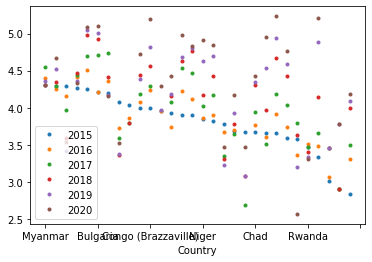

In [156]:
for i, year in enumerate(years):
    df['Score'][year][sad2015.keys()].plot(style='.', label=year, legend=True)

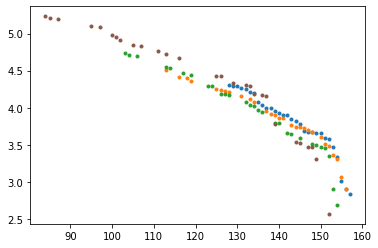

In [118]:
for year in years:
    cond = df['Country'][year].isin(sad2015)
    df['Score'][year].where(cond).plot(style='.')

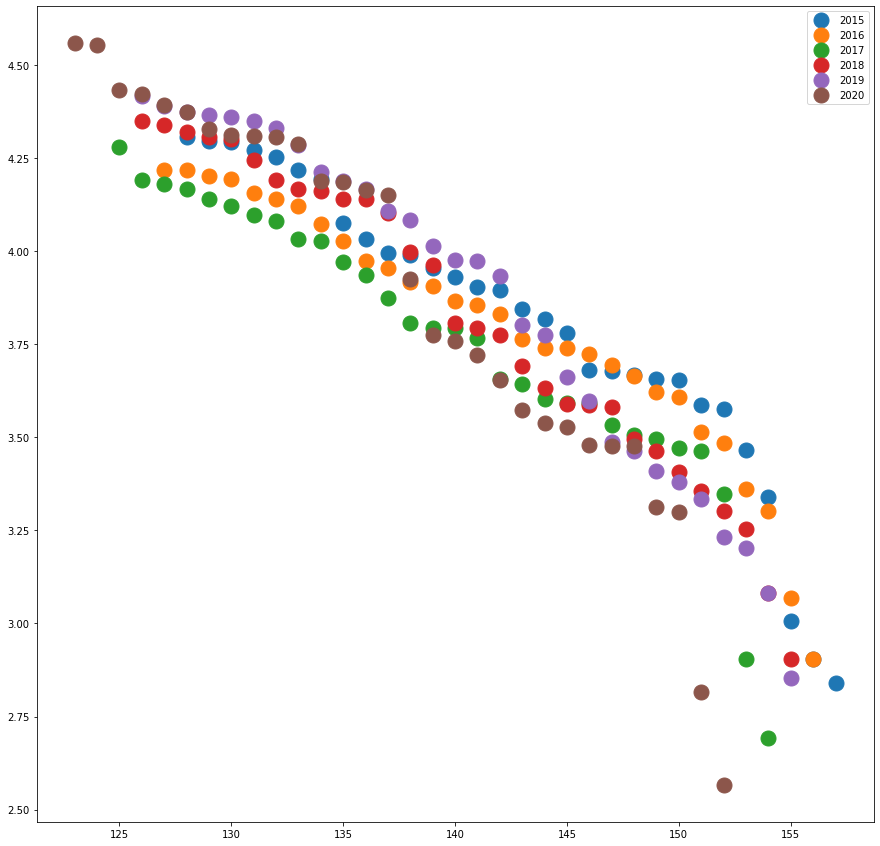

In [99]:
for year in years:
    df['Score'][year][-30:].plot(style='.', figsize=(15, 15), label=year, legend=True, markersize=30)

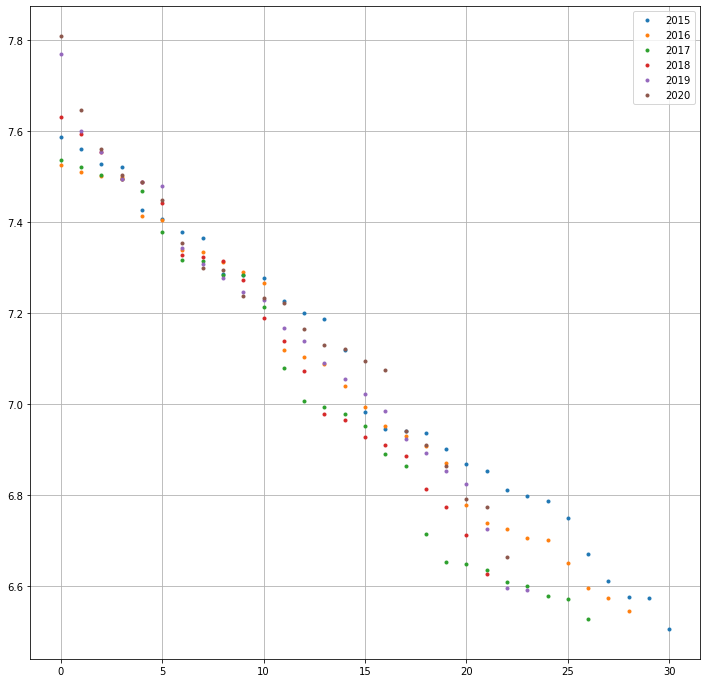

In [16]:
for year in years:
    happy[year]['Score'].plot(style='.', figsize=(12,12), legend=True, label=year)
plt.grid()

## Clustering

In [5]:
variables =  [#'Logged GDP per capita',
             #'Social support',
             #'Healthy life expectancy',
             #'Freedom to make life choices',
             #'Generosity',
             #'Perceptions of corruption',
             'Explained by: Log GDP per capita', 
             'Explained by: Social support',
             'Explained by: Healthy life expectancy',
             'Explained by: Freedom to make life choices',
             'Explained by: Generosity',
             'Explained by: Perceptions of corruption',
             ]

In [ ]:
dataset = dataset[:23]
#dataset = dataset[138:]

In [ ]:
kdata = dataset[variables]
X = kdata.values

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, '.')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
dataset['cluster']= y_kmeans

## Map 

From this blog post https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

In [ ]:
shapefile = 'map_files/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']

In [ ]:
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

In [ ]:
not_in_report = ['Democratic Republic of the Congo',
               'Fiji',
                'Western Sahara',
                'Papua New Guinea',
                'Somalia',
                'Sudan',
                'The Bahamas',
                'Falkland Islands',
                'Greenland',
               'French Southern and Antarctic Lands',
                'East Timor',
                'Belize',
                'Guyana',
                'Suriname',
                'Puerto Rico',
                'Cuba',
                'Guinea-Bissau',
                'Equatorial Guinea',
                'Angola',
                'Qatar',
                'Oman',
                'Vanuatu',
                'North Korea',
                'Bhutan',
                'Syria',
                'New Caledonia',
                'Solomon Islands',
                'Brunei',
                'Eritrea',
                'Northern Cyprus',
                'Djibouti',
                'Somaliland',
              ]

In [ ]:
not_on_map = ['Malta',
                  'Singapore',
                  'Bahrain',
                  'Mauritius',
                  'North Cyprus',
                  'Hong Kong S.A.R. of China',
                  'Maldives',
                  'Congo (Brazzaville)',
                  'Comoros'
                 ]

In [ ]:
replacements = {'United States of America':'United States',
               'Czechia':'Czech Republic',
                #: 'Malta',
                'Taiwan' : 'Taiwan Province of China',
                #: 'Singapore',
                #: 'Bahrain',
                #: 'Mauritius',
                'Republic of Serbia' : 'Serbia',
                #: 'North Cyprus',
                #: 'Hong Kong S.A.R. of China',
                #: 'Maldives',
                #'Republic of the Congo' : 'Congo (Brazzaville)',
                'Palestine' : 'Palestinian Territories',
                'Republic of the Congo' : 'Congo (Kinshasa)',
                'eSwatini' : 'Swaziland',
                #: 'Comoros',
                'United Republic of Tanzania' : 'Tanzania',
                }

In [ ]:
# Make names match
gdf = gdf.replace(replacements)

In [ ]:
#Merge dataframes gdf and df_2016.
merged = gdf.merge(dataset, left_on = 'country', right_on = 'Country name', how='left')

In [ ]:
merged.columns

In [ ]:
import json
#Read data to json.
merged_json = json.loads(merged.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [ ]:
field = 'cluster'

In [ ]:

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = dataset[field].min(), high = dataset[field].max(), nan_color = '#d9d9d9')
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal')

#Create figure object.
p = figure(title = field, plot_height = 600 , plot_width = 950, toolbar_location = None)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :field, 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify figure layout.
p.add_layout(color_bar, 'below')

#Display figure inline in Jupyter Notebook.
output_notebook()

#Display figure.
show(p)

In [ ]:
dataset['Country name'].values

In [ ]:
plt.figure()
dataset.groupby(by=['cluster'])['Ladder score'].plot(style='.', figsize=(16,8))
plt.xticks(np.arange(138, 138+len(dataset)), dataset['Country name'].values, rotation=90)
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
for variable in variables:
    plt.figure()
    dataset.groupby(by=['cluster'])[variable].mean().plot(kind='bar', logy=False)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
dataset.groupby(by=['cluster'])['Ladder score'].mean()

In [ ]:
dataset.groupby(by=['cluster'])[variables].mean()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [ ]:
my_list = []
for f,c in zip(explained_features, px.colors.qualitative.D3):
    my_list.append(go.Bar(y=df.nlargest(10,"Happiness score")["Country name"].values,
                          x=df.nlargest(10,"Happiness score")[f].values,
                          name=f,
                          marker=dict(color=c),
                          orientation="h"))
fig = go.Figure(data=my_list)
fig.update_traces(marker_line_color='rgb(255,255,255)',
                  marker_line_width=2.5, opacity=0.7)
fig.update_layout(
                width=900,
                barmode='stack',
                 yaxis=dict(autorange="reversed"),
                )
fig.show()